### Link Counting Script
- Accompanies main MSci thesis on "black hole entropy in a causal set spacetime"
- Written by D.S.W. Gould

In [120]:
#Import libraries
import numpy as np
import random 
import matplotlib.pyplot as plt
from itertools import permutations, combinations, product
from mpl_toolkits import mplot3d

### (1+1) Minkowski sprinkling
- counting structures in (1+1) dimensional Minkowski metrics

In [121]:
#Basic functions for use later on.
# Each spacetime elements has the form:
# [    ( (x,t), (u,v), ELEMENT NUMBER ) ,  ...] for each element
def nullcoords(element):
    """return (u,v) coordinates when give in form (x,t)
    """
    return (1/np.sqrt(2))*(element[0]+element[1]),(1/np.sqrt(2))*(element[1]-element[0])

def t(element):
    """return t coordinate of element
    """
    return element[0][1]

def x(element):
    """return x coordinate of element
    """
    return element[0][0]

def u(element):
    """return u coordinate of element
    """
    return element[1][0]

def v(element):
    """return v coordinate of element
    """
    return element[1][1]

def number(element):
    """return the numerical label given to the element
    """
    return element[2]

### Perform multiple sprinklings and see behaviour as density increases

In [122]:
N_mean_list = np.linspace(1,1000,100) #list of N (#points sprinkled) to be iterated over

values = []
stds = []
for val in N_mean_list:
    
    N_mean = val
    N_repetitions = 20 #number of repetitions at each stage


    count = []
    for i in range(N_repetitions):
        counter = 0
        #print i, "out of", N_repetitions
        N = int(np.random.poisson(N_mean))
        xlist = [random.uniform(-1/np.sqrt(2),1/np.sqrt(2)) for i in range(N)]
        tlist = [random.uniform(0,np.sqrt(2)) for i in range(N)]

        elements = zip(xlist,tlist)
        elements_uv = [nullcoords(i) for i in elements]
        elements = [(elements[i],elements_uv[i],i) for i in range(len(elements))]

        # Find other elements above x, check if there is only one, check if its required region
        for element in elements:

            #If x in the required region
            if t(element) < 1/np.sqrt(2) and v(element) <0.5:
                abovex = [] #list of elements above x, but below sigma

                #Search for element y
                for element2 in elements:
                    #If y above x and they aren't the same element
                    if number(element) != number(element2) and u(element) < u(element2) and v(element) < v(element2):
                        # If y below sigma
                        if t(element2) < 1/np.sqrt(2):
                            abovex.append(element2)
                # If there's only one element above x, and that element is above the Horizon:
                if len(abovex) == 1 and v(abovex[0]) >0.5:
                    counter +=1
        count.append(counter)

    print "Mean Number of Links: ", np.mean(count), "with variance: ", np.var(count), "at a sprinkling density of", N_mean/2.0, "with number of repetitions: ", N_repetitions
    values.append((np.mean(count),float(np.std(count))/np.sqrt(len(count))))
    stds.append(float(np.std(count)))
    
    
plt.figure()
plt.errorbar([i/2.0 for i in N_mean_list],[i[0] for i in values],yerr=[i[1] for i in values],label='Simulation')
plt.plot([i/2.0 for i in N_mean_list],[1./3. for i in range(len(N_mean_list))],'--',color='r',label='Analytic')
plt.xlabel(r'$\rho$')
plt.ylabel('<n>')
plt.legend()
plt.savefig('Part(i)_asymptotic_behaviour')
plt.show()

plt.figure()
plt.plot([i/2.0 for i in N_mean_list],[i[0] for i in values],label='Simulation')
plt.plot([i/2.0 for i in N_mean_list],[1./3. for i in range(len(N_mean_list))],'--',color='r',label='Analytic')
plt.xlabel(r'$\rho$')
plt.ylabel('<n>')
plt.legend()
plt.savefig('Part(i)_asymptotic_behaviour_without_bars')
plt.show()

plt.figure()
plt.plot([i/2.0 for i in N_mean_list],[stds[i]/values[i][0] for i in range(len(stds))])
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{\sigma}{ <n>}$')
plt.savefig('Part(i)_asymptotic_behaviour_error plot')
plt.show()

Mean Number of Links:  0.0 with variance:  0.0 at a sprinkling density of 0.5 with number of repetitions:  30
Mean Number of Links:  0.266666666667 with variance:  0.195555555556 at a sprinkling density of 5.52261306533 with number of repetitions:  30
Mean Number of Links:  0.366666666667 with variance:  0.498888888889 at a sprinkling density of 10.5452261307 with number of repetitions:  30
Mean Number of Links:  0.6 with variance:  0.64 at a sprinkling density of 15.567839196 with number of repetitions:  30
Mean Number of Links:  0.633333333333 with variance:  0.898888888889 at a sprinkling density of 20.5904522613 with number of repetitions:  30
Mean Number of Links:  0.233333333333 with variance:  0.245555555556 at a sprinkling density of 25.6130653266 with number of repetitions:  30
Mean Number of Links:  0.6 with variance:  0.573333333333 at a sprinkling density of 30.635678392 with number of repetitions:  30
Mean Number of Links:  0.333333333333 with variance:  0.288888888889 at 

Mean Number of Links:  0.666666666667 with variance:  0.422222222222 at a sprinkling density of 301.85678392 with number of repetitions:  30
Mean Number of Links:  0.266666666667 with variance:  0.195555555556 at a sprinkling density of 306.879396985 with number of repetitions:  30
Mean Number of Links:  0.3 with variance:  0.41 at a sprinkling density of 311.90201005 with number of repetitions:  30
Mean Number of Links:  0.3 with variance:  0.276666666667 at a sprinkling density of 316.924623116 with number of repetitions:  30
Mean Number of Links:  0.5 with variance:  0.583333333333 at a sprinkling density of 321.947236181 with number of repetitions:  30
Mean Number of Links:  0.366666666667 with variance:  0.365555555556 at a sprinkling density of 326.969849246 with number of repetitions:  30
Mean Number of Links:  0.266666666667 with variance:  0.328888888889 at a sprinkling density of 331.992462312 with number of repetitions:  30
Mean Number of Links:  0.433333333333 with variance

Mean Number of Links:  0.3 with variance:  0.343333333333 at a sprinkling density of 608.236180905 with number of repetitions:  30
Mean Number of Links:  0.366666666667 with variance:  0.365555555556 at a sprinkling density of 613.25879397 with number of repetitions:  30
Mean Number of Links:  0.533333333333 with variance:  0.715555555556 at a sprinkling density of 618.281407035 with number of repetitions:  30
Mean Number of Links:  0.333333333333 with variance:  0.288888888889 at a sprinkling density of 623.304020101 with number of repetitions:  30
Mean Number of Links:  0.433333333333 with variance:  0.378888888889 at a sprinkling density of 628.326633166 with number of repetitions:  30
Mean Number of Links:  0.266666666667 with variance:  0.395555555556 at a sprinkling density of 633.349246231 with number of repetitions:  30
Mean Number of Links:  0.2 with variance:  0.16 at a sprinkling density of 638.371859296 with number of repetitions:  30
Mean Number of Links:  0.266666666667 w

KeyboardInterrupt: 

### (2+1) Minkowski sprinkling
- counting structures in (1+1) dimensional Minkowski metrics
#### Set up:
- Box of sides (x=L,y=L,t=T=L/2)
- Plane H with equation: t=x-L/5

Therefore we require elements 'x' to be underneath the curves:
- t = x-L/5 (for x<7L/10)
- t = -x + 12L/10 (for x>7L/10)

In [ ]:
L= 1.0
T = L*0.5

    
def x(element):
    return element[0]
def y(element):
    return element[1]
def t(element):
    return element[2]
def dot_product(element,element2):    
    return -1*((t(element2)-t(element))**2)+ ((x(element2)-x(element))**2)+ ((y(element2)-y(element))**2)

def is_x(element):
    """return True if element is in causal past of H intersect Sigma
    """
    if x(element) <= (7*L)/10:
        if t(element) <= x(element) - (L/5):
            return True
        else:
            return False
    else:
        if t(element) <= (-1*x(element))+((12*L)/10):
            return True
        else:
            return False
        
def is_above_H(element):
    """return True if element is in causal future of H 
    """
    if x(element) >= (7*L)/10.0:
        return False
    else:
        if t(element) > x(element) - (L/5):
            return True
        else:
            return False
        
        
def directly_above(element,element2):
    if t(element2) >= t(element):
        return True
    else:
        return False

In [ ]:
N_mean_list = np.linspace(1,1000,200)

means = []
stds = []
variances = []
for val in N_mean_list:
    N_mean = val
    N_repetitions = 20

    
    count = []
    for i in range(N_repetitions):
        counter = 0
        N = int(np.random.poisson(N_mean))
        xlist = [random.uniform(0,L) for j in range(N)]
        ylist = [random.uniform(0,L) for j in range(N)]
        tlist = [random.uniform(0,T) for j in range(N)]
        
        
        elements = zip(xlist,ylist,tlist)

        for element in elements:
            if is_x(element):
                above_x = []
                for element2 in elements:
                    if dot_product(element,element2) <=0 and element != element2 and directly_above(element,element2):
                        above_x.append(element2)
                if len(above_x) == 1.0 and is_above_H(above_x[0]):
                    counter +=1  
        count.append(counter)

    print "Mean number of counts", np.mean(count), "constant obtained: ", (np.mean(count)*l)/float(L)
    #Constant of predicted order(1) is real length/ (<n>*discreteness length)
    rho = float(N_mean)/(L*L*T)
    l = (1./rho)**(1./3)
    means.append((np.mean(count)*l)/float(L))
    variances.append((np.std(count)*l)/(float(L)*np.sqrt(len(count))))
    stds.append((np.std(count)*l)/(float(L)))

plt.figure()
plt.errorbar([i/(L*L*T) for i in N_mean_list],means,yerr=variances,label='simulation',color='b')
plt.plot([i/(L*L*T) for i in N_mean_list],[0.218853 for i in range(len(N_mean_list))],'--',label='analytic',color='r')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{l<n>}{L}$')
plt.legend()
plt.savefig('3D_PLOTTING_BOX')
plt.show()

plt.figure()
plt.plot([i/(L*L*T) for i in N_mean_list],means,label='simulation',color='b')
plt.plot([i/(L*L*T) for i in N_mean_list],[0.218853 for i in range(len(N_mean_list))],'--',label='analytic',color='r')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{l<n>}{L}$')
plt.legend()
plt.savefig('3D_PLOTTING_BOX_without_bars')
plt.show()


plt.figure()
plt.plot([i/(L*L*T) for i in N_mean_list],[stds[i]/means[i] for i in range(len(means))],color='b')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{\sigma}{<n>}$')
plt.savefig('3D_error_plot')
plt.show()

### (2+1) Minkowski sprinkling with conical horizon
- exactly the same as above, but with H as full cone rather than sheet.
- should give exactly the same constant!

- sprinkle into box (2L, 2L, L/2).
Equation of Cone:
\begin{equation}
(x-L)^2 + (y-L)^2 = t^2
\end{equation}

In [133]:
L= 1.0
T = L*0.8

    
def x(element):
    return element[0]
def y(element):
    return element[1]
def t(element):
    return element[2]
def dot_product(element,element2):    
    return -1*((t(element2)-t(element))**2)+ ((x(element2)-x(element))**2)+ ((y(element2)-y(element))**2)




def is_above_H(element):
    """return True if element is in the causal future of H
    """
    if t(element) > np.sqrt((((x(element)-(L))**2)+((y(element)-(L))**2))):
        return True
    else:
        return False

def is_x(element):
    """return True if element is in causal past of H intersect Sigma
    """
    if is_above_H(element):
        return False
    else:
        return True
    
        
def directly_above(element,element2):
    if t(element2) >= t(element):
        return True
    else:
        return False

Mean number of counts 0.0 constant obtained:  0.0
Mean number of counts 0.25 constant obtained:  0.0732914779394
Mean number of counts 0.6 constant obtained:  0.0966933946112
Mean number of counts 0.8 constant obtained:  0.105328151942
Mean number of counts 0.95 constant obtained:  0.110387317042
Mean number of counts 1.35 constant obtained:  0.143269675204
Mean number of counts 1.3 constant obtained:  0.128481480817
Mean number of counts 1.75 constant obtained:  0.163105592261
Mean number of counts 1.75 constant obtained:  0.15517412983
Mean number of counts 2.55 constant obtained:  0.216517182978
Mean number of counts 2.5 constant obtained:  0.204283207298
Mean number of counts 2.05 constant obtained:  0.161848186133
Mean number of counts 2.85 constant obtained:  0.218101442016
Mean number of counts 2.3 constant obtained:  0.171064566777
Mean number of counts 2.05 constant obtained:  0.148518538473
Mean number of counts 2.6 constant obtained:  0.183834942737
Mean number of counts 3.2

Mean number of counts 4.85 constant obtained:  0.162598749339
Mean number of counts 7.05 constant obtained:  0.235766344028
Mean number of counts 5.45 constant obtained:  0.181808616787
Mean number of counts 5.3 constant obtained:  0.176370935461
Mean number of counts 5.6 constant obtained:  0.18590033326
Mean number of counts 6.05 constant obtained:  0.200353161255
Mean number of counts 4.4 constant obtained:  0.145361623343
Mean number of counts 5.3 constant obtained:  0.174677389172
Mean number of counts 6.35 constant obtained:  0.208788054517
Mean number of counts 4.9 constant obtained:  0.160733485806
Mean number of counts 6.4 constant obtained:  0.20944778781
Mean number of counts 6.4 constant obtained:  0.208962501193
Mean number of counts 5.8 constant obtained:  0.188936523533
Mean number of counts 6.2 constant obtained:  0.201505091947
Mean number of counts 6.4 constant obtained:  0.207533156554
Mean number of counts 6.2 constant obtained:  0.200594522878
Mean number of counts

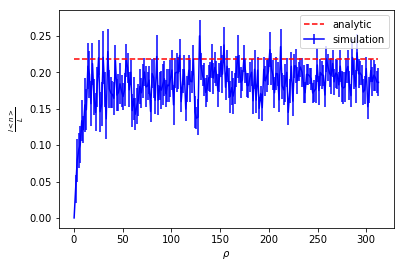

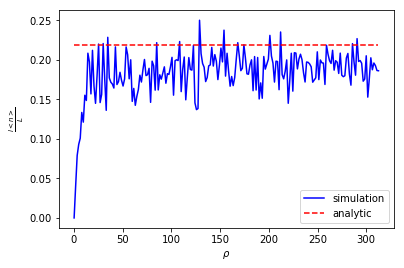

/Users/DewiGould/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


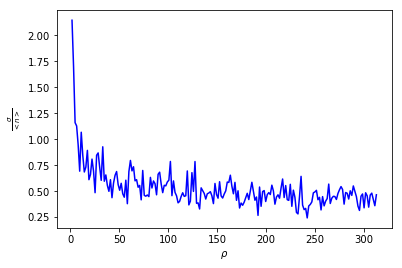

In [141]:
N_mean_list = np.linspace(1,1000,200)

means = []
stds = []
variances = []
for val in N_mean_list:
    N_mean = val
    N_repetitions = 20

    
    count = []
    for i in range(N_repetitions):
        counter = 0
        N = int(np.random.poisson(N_mean))
        xlist = [random.uniform(0,2*L) for j in range(N)]
        ylist = [random.uniform(0,2*L) for j in range(N)]
        tlist = [random.uniform(0,T) for j in range(N)]
        
        
        elements = zip(xlist,ylist,tlist)

        for element in elements:
            if is_x(element):
                above_x = []
                for element2 in elements:
                    if dot_product(element,element2) <=0 and element != element2 and directly_above(element,element2):
                        above_x.append(element2)
                if len(above_x) == 1.0 and is_above_H(above_x[0]):
                    counter +=1  
        count.append(counter)

    print "Mean number of counts", np.mean(count), "constant obtained: ", (np.mean(count)*l)/diam
    #Constant of predicted order(1) is real length/ (<n>*discreteness length)
    rho = float(N_mean)/(4*L*L*T)
    l = (1./rho)**(1./3)
    diam = 2*np.pi*T
    means.append((np.mean(count)*l)/diam)
    variances.append((np.std(count)*l)/(diam*np.sqrt(len(count))))
    stds.append((np.std(count)*l)/(diam))

plt.figure()
plt.errorbar([i/(4*L*L*T) for i in N_mean_list],means,yerr=variances,label='simulation',color='b')
plt.plot([i/(4*L*L*T) for i in N_mean_list],[0.218853 for i in range(len(N_mean_list))],'--',label='analytic',color='r')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{l<n>}{L}$')
plt.legend()
plt.savefig('3D_PLOTTING_CONE')
plt.show()

plt.figure()
plt.plot([i/(4*L*L*T) for i in N_mean_list],means,label='simulation',color='b')
plt.plot([i/(4*L*L*T) for i in N_mean_list],[0.218853 for i in range(len(N_mean_list))],'--',label='analytic',color='r')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{l<n>}{L}$')
plt.legend()
plt.savefig('3D_PLOTTING_CONE_without_bars')
plt.show()


plt.figure()
plt.plot([i/(4*L*L*T) for i in N_mean_list],[stds[i]/means[i] for i in range(len(means))],color='b')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\frac{\sigma}{<n>}$')
plt.savefig('3D_CONE_error_plot')
plt.show()